In [1]:
import pandas as pd

# Load the datasets
nba_tweets = pd.read_csv('/home/skhorsand/Group055_WI24/Tweets/NBA_tweets.csv')
nba_stats = pd.read_csv('/home/skhorsand/Group055_WI24/Data/NBAStats.csv')

nfl_tweets = pd.read_csv('/home/skhorsand/Group055_WI24/Tweets/NFL_tweets.csv')
nfl_stats = pd.read_csv('/home/skhorsand/Group055_WI24/Data/NFLStats.csv')

mlb_tweets = pd.read_csv('/home/skhorsand/Group055_WI24/Tweets/MLB_tweets.csv')
mlb_stats = pd.read_csv('/home/skhorsand/Group055_WI24/Data/MLBStats.csv')

# Convert date columns to datetime format and ensure they are without timezone information
nba_tweets['date'] = pd.to_datetime(nba_tweets['date']).dt.tz_localize(None)
nba_stats['Date'] = pd.to_datetime(nba_stats['Date'])

nfl_tweets['date'] = pd.to_datetime(nfl_tweets['date']).dt.tz_localize(None)
nfl_stats['Date'] = pd.to_datetime(nfl_stats['Date'])

mlb_tweets['date'] = pd.to_datetime(mlb_tweets['date']).dt.tz_localize(None)
mlb_stats['Date'] = pd.to_datetime(mlb_stats['Date'])

# Filter out the tweets that mention players and then merge
nba_merged = nba_tweets[nba_tweets['contains_player']].merge(nba_stats, left_on='date', right_on='Date')
nfl_merged = nfl_tweets[nfl_tweets['contains_player']].merge(nfl_stats, left_on='date', right_on='Date')
mlb_merged = mlb_tweets.merge(mlb_stats, left_on='date', right_on='Date')

# Save the merged dataframes to CSV files
nba_merged.to_csv('NBA_Merged.csv', index=False)
nfl_merged.to_csv('NFL_Merged.csv', index=False)
mlb_merged.to_csv('MLB_Merged.csv', index=False)

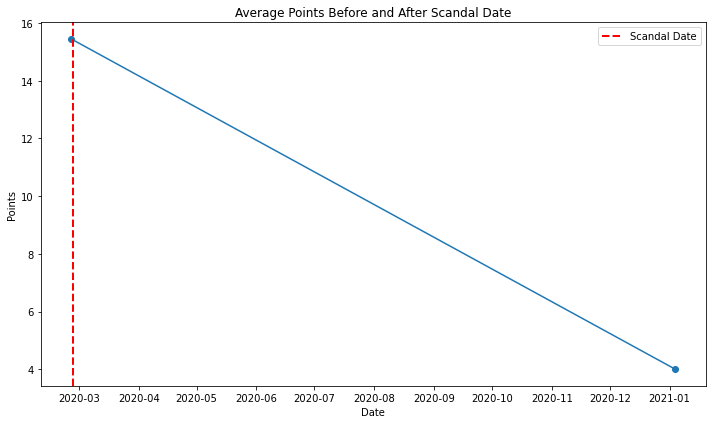

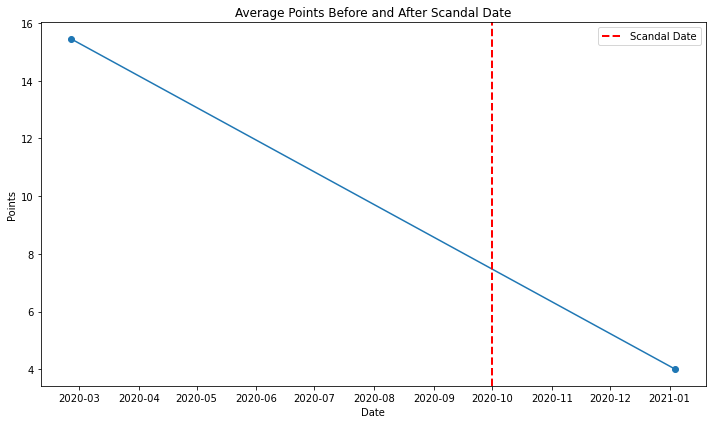

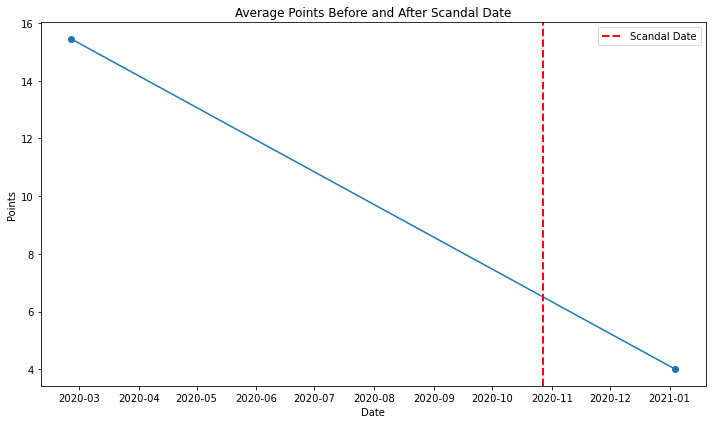

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

def plot_performance_timeline(stats, tweets, metric, player_col='Player'):
    # Ensure we are working with the correct column names
    if player_col not in stats.columns or 'date' not in tweets.columns:
        raise ValueError("The specified player_col or date column does not exist in the provided DataFrames.")
    
    # Convert dates to pandas datetime format for both stats and tweets
    stats['Date'] = pd.to_datetime(stats['Date'])
    tweets['date'] = pd.to_datetime(tweets['date'])

    # Sort the stats DataFrame based on the Date
    stats.sort_values(by='Date', inplace=True)
    # Get the unique scandal dates from the tweets DataFrame
    scandal_dates = tweets['date'].unique()
  
    for scandal_date in scandal_dates:
        # Filter the stats for dates before and after the scandal
        before_scandal = stats[stats['Date'] < scandal_date]
        after_scandal = stats[stats['Date'] > scandal_date]

        # Skip if no data is available before or after the scandal date
        if before_scandal.empty or after_scandal.empty:
            continue

        # Get the mean performance before and after the scandal
        mean_before = before_scandal[metric].mean()
        mean_after = after_scandal[metric].mean()

        # Create a DataFrame for plotting
        df_plot = pd.DataFrame({
            'Date': [before_scandal['Date'].iloc[-1], after_scandal['Date'].iloc[0]],
            metric: [mean_before, mean_after]
        })

        # Plotting the timeline
        plt.figure(figsize=(10, 6))
        plt.plot(df_plot['Date'].values, df_plot[metric].values, marker='o', linestyle='-')
        plt.axvline(x=scandal_date, color='red', linestyle='--', lw=2, label='Scandal Date')

        # Formatting the plot
        plt.xlabel('Date')
        plt.ylabel(metric)
        plt.title(f'Average {metric} Before and After Scandal Date')
        plt.legend()
        plt.tight_layout()

        # Show the plot
        plt.show()

# Example call for the function
plot_performance_timeline(nba_stats, nba_tweets, 'Points')